In [1]:
import pandas as pd

resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
resenha.shape

(49459, 4)

In [3]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                             random_state = 42)

In [4]:
classe_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [5]:
# from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)

In [6]:
classificacao = resenha["sentiment"].replace(['neg', 'pos'],[0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [7]:
resenha['classificacao'] = classificacao

In [8]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [9]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## Exemplo de PNL

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme bom', 'Assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)


In [11]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [12]:
vetorizar.get_feature_names()

['Assisti', 'bom', 'filme', 'ruim', 'um']

In [13]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [14]:
matriz_esparsa

,Assisti,bom,filme,ruim,um
0,1,1,1,0,1
1,1,0,1,1,1


# Caso real de PML

Com o método a seguir é feito a criação do vocabulário com todas as palavras de todas as linhas da coluna 'text_pt'. A matriz resultante possui 156.923 colunas. Isso afeta na memória e tempo de processamento do computador

In [15]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

In [16]:
print(bag_of_words.shape)

(49459, 156923)


Com o intuito de diminuir o tamanho da bag_of_words é possível usar o método abaixo que ajusta ao tamannho da matriz desejada  e guarda no vocabulário apenas as palavras que mais aparecem no corpo textual

In [17]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [18]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha.classificacao,
                                                             random_state = 42)

from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


Função de classificar texto

In [19]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                             random_state = 42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)
    return acuracia
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


## Visualizando dados com WordCloud

In [20]:
from wordcloud import WordCloud

Conjunto de frases em uma lista:

In [21]:
todas_palavras = [texto for texto in resenha['text_pt']]
todas_palavras

['Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 'Este é um exemp

In [22]:
len(todas_palavras)

49459

Conjunto de palavras em uma lista:

In [23]:
todas_palavras = ''.join([texto for texto in resenha['text_pt']])
len(todas_palavras)

63398966

Construção da WordCloud

In [24]:
nuvem_palavras = WordCloud().generate(todas_palavras)

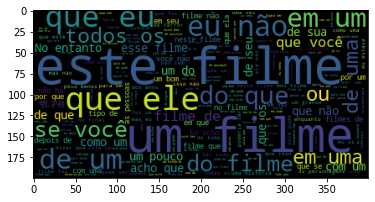

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

## Melhorando a visualização

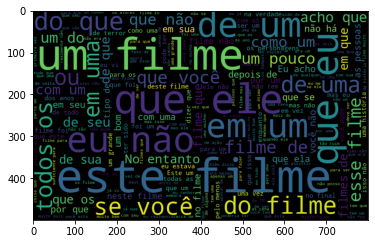

In [26]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

In [27]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

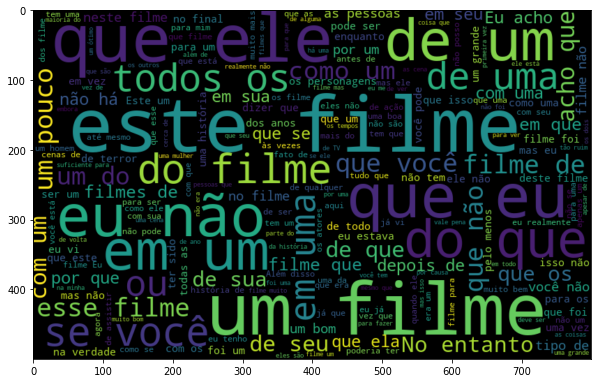

In [28]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

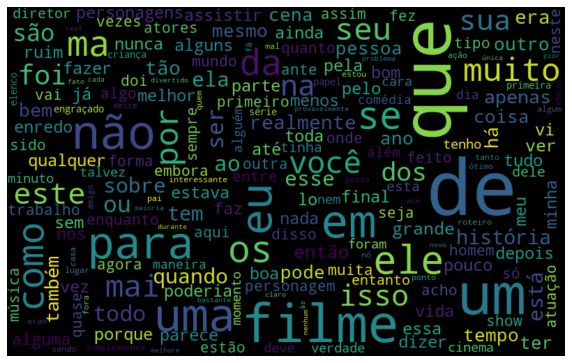

In [29]:
nuvem_palavras = WordCloud(width=800, 
                           height=500, 
                           max_font_size=110,
                          collocations=False).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
resenha.query("sentiment =='pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [31]:
def nuvem_palavras_neg(texto, coluna_texto):  
    texto_negativo = resenha.query("sentiment =='neg'")
    
    todas_palavras = ''.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, 
                               height=500, 
                               max_font_size=110,
                              collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [32]:
def nuvem_palavras_pos(texto, coluna_texto):  
    texto_positivo = resenha.query("sentiment =='pos'")
    
    todas_palavras = ''.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, 
                               height=500, 
                               max_font_size=110,
                              collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

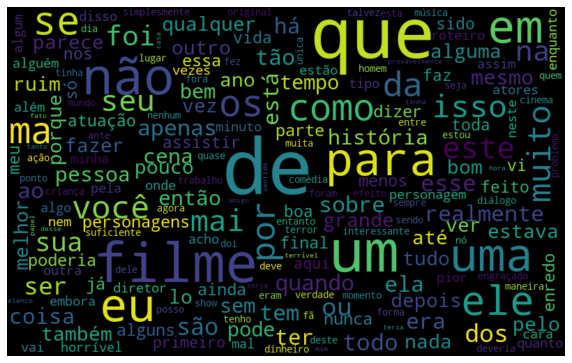

In [33]:
nuvem_palavras_neg(resenha, 'text_pt')

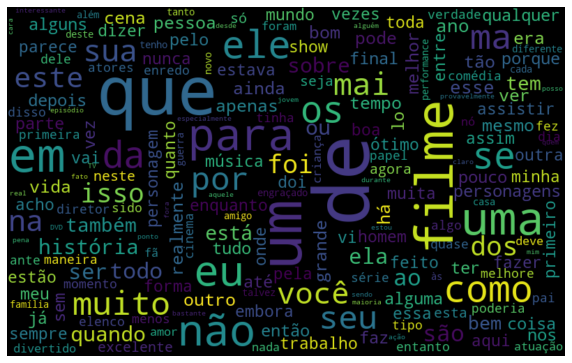

In [34]:
nuvem_palavras_pos(resenha, 'text_pt')

## Conhecendo a bilblioteca NLTK

In [35]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   P

[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /Users/miqueiasaraujo/nltk_data...
[nltk_data]

True

In [36]:
frase = ['um filme ruim', 'um filme bom']

frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [37]:
from nltk import tokenize

frase = 'Bem vindo ao mundo PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'PLN!']


In [38]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'Bem': 1, 'vindo': 1, 'ao': 1, 'mundo': 1, 'PLN!': 1})

In [39]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [40]:
frequencia

FreqDist({'de': 417383, 'que': 325058, 'e': 299720, 'o': 244836, 'um': 216380, 'a': 210154, 'é': 192359, 'em': 132770, 'uma': 130883, 'não': 127894, ...})

In [41]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                              'Frequencia':list(frequencia.values())
                             })
df_frequencia

,Palavra,Frequencia
0,Mais,1469
1,uma,130883
2,"vez,",1927
3,o,244836
4,Sr.,1738
...,...,...
379921,"Muppified,",1
379922,inventora,1
379923,"""Union",1
379924,beirar,1


In [42]:
df_frequencia.nlargest(columns='Frequencia', n=10)

,Palavra,Frequencia
20,de,417383
14,que,325058
42,e,299720
3,o,244836
7,um,216380
102,a,210154
45,é,192359
199,em,132770
1,uma,130883
29,não,127894


In [ ]:
import seaborn as sns

plt.